In [5]:
# 导入必要的库
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False

### task1&2
- 结合业务知识，探索商场经营情况，挖掘潜在影响因素

- 为商场今年的运营提供建议

In [6]:
# 读取数据
data = pd.read_excel("data.xls")
#将行ID作为索引
data = data.set_index('行 ID')
# 查看数据的基本信息
print(data.info())

# 探索销售额、数量和利润的统计信息
print(data[['销售额', '数量', '利润']].describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9959 entries, 1 to 10000
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   订单 ID   9959 non-null   object        
 1   订单日期    9959 non-null   datetime64[ns]
 2   发货日期    9959 non-null   datetime64[ns]
 3   邮寄方式    9959 non-null   object        
 4   客户 ID   9959 non-null   object        
 5   客户名称    9959 non-null   object        
 6   细分      9959 non-null   object        
 7   城市      9959 non-null   object        
 8   省/自治区   9959 non-null   object        
 9   国家      9959 non-null   object        
 10  地区      9959 non-null   object        
 11  产品 ID   9959 non-null   object        
 12  类别      9959 non-null   object        
 13  子类别     9959 non-null   object        
 14  产品名称    9959 non-null   object        
 15  销售额     9954 non-null   float64       
 16  数量      9950 non-null   float64       
 17  折扣      9952 non-null   float64       
 18  利润     

           销售额        数量        折扣        利润      订单月份
销售额   1.000000  0.375645 -0.048763  0.473209 -0.000406
数量    0.375645  1.000000  0.003344  0.151531  0.005462
折扣   -0.048763  0.003344  1.000000 -0.383156 -0.010320
利润    0.473209  0.151531 -0.383156  1.000000 -0.006598
订单月份 -0.000406  0.005462 -0.010320 -0.006598  1.000000
产品销售情况：
 产品名称
摩托罗拉 充电器, 混合尺寸                 115078.264
Harbour Creations 扶手椅, 每套两件    102817.484
KitchenAid 炉灶, 黑色               99410.696
Safco 书库, 传统                    94952.844
Harbour Creations 扶手椅, 可调       93537.780
苹果 充电器, 蓝色                      92632.176
Breville 炉灶, 白色                 89847.296
Novimex 扶手椅, 每套两件               88695.880
摩托罗拉 充电器, 全尺寸                   88354.056
Hamilton Beach 冰箱, 黑色           83459.824
Name: 销售额, dtype: float64
地域销售情况：
 地区
华东    4680753.742
中南    4137415.093
东北    2681421.729
华北    2447301.017
西南    1303124.508
西北     814997.316
Name: 销售额, dtype: float64
客户销售情况：
 客户名称
徐婵    82895.260
黄磊    81751.600
田磊    77369.334
武杰

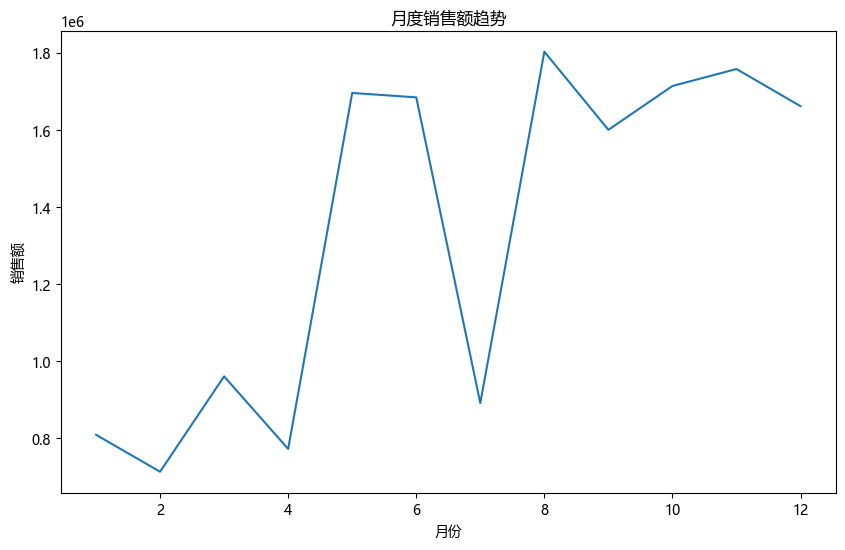

月度销售额趋势：
 订单月份
1      809311.027
2      713460.076
3      960784.405
4      772618.406
5     1695929.956
6     1684499.068
7      891545.529
8     1802889.032
9     1600316.494
10    1714023.395
11    1758040.802
12    1661595.215
Name: 销售额, dtype: float64


In [10]:
# 1. 销售额与其他变量的相关性分析
correlation_matrix = data.corr()
print(correlation_matrix)

# 2. 产品销售情况分析
product_sales = data.groupby('产品名称')['销售额'].sum().sort_values(ascending=False)
print("产品销售情况：\n", product_sales.head(10))

# 3. 地域分析
region_sales = data.groupby('地区')['销售额'].sum().sort_values(ascending=False)
print("地域销售情况：\n", region_sales)

# 4. 客户分析
customer_sales = data.groupby('客户名称')['销售额'].sum().sort_values(ascending=False)
print("客户销售情况：\n", customer_sales.head(10))

# 5. 时间趋势分析
data['订单月份'] = data['订单日期'].dt.month
monthly_sales = data.groupby('订单月份')['销售额'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('月度销售额趋势')
plt.xlabel('月份')
plt.ylabel('销售额')
plt.show()
print("月度销售额趋势：\n", monthly_sales)

#### tsak1&2 结果分析解读：

销售额与其他变量的相关性分析：

销售额与数量的相关性（0.38）： 两者之间存在一定的正相关关系，表明销售额与销售数量之间有一定程度的线性关系。这可能意味着销售额的增加主要是由销售数量的增加引起的。

销售额与折扣的相关性（-0.05）： 相关性较低，表明销售额与折扣之间的线性关系不强。这可能说明降价折扣并没有显著地影响销售额，或者折扣的实施策略需要重新评估。

销售额与利润的相关性（0.47）： 存在较强的正相关性，表明销售额的增加与利润的增加有较强的关联。这可能意味着商场在提高销售额的同时也增加了利润，但仍需注意其他潜在因素对利润的影响。

产品销售情况：
- 结果： 摩托罗拉充电器、Harbour Creations扶手椅等是最畅销的产品。
- 解读： 商场应关注这些热门产品，考虑增加库存或设计相关促销活动，以进一步提升销售额。

地域销售情况：
- 结果： 华东地区对销售额贡献最大。
- 解读： 商场可以加强在华东地区的市场营销活动，进一步挖掘该地区的潜在市场。

客户销售情况：
- 结果： 徐婵、黄磊等是最大贡献的客户。
- 解读： 商场应该重点关注这些客户，提供更个性化的服务，以增加他们的购买频率和额度。

月度销售额趋势：
- 结果： 销售额在5月和8月达到峰值。
- 解读： 商场可以进一步分析5月和8月的销售情况，探索是什么原因导致销售增长，以制定相应的销售策略。

### task3
为商场建立一个用户画像系统，输入用户姓名得到用户消费习惯

In [11]:
import pandas as pd

# 读取数据
data = pd.read_excel("data.xls")
# 将行ID作为索引
data = data.set_index('行 ID')

def get_user_profile(user_name):
    # 根据用户姓名筛选数据
    user_data = data[data['客户名称'] == user_name]

    if user_data.empty:
        return "找不到该用户信息"

    # 用户的消费习惯分析
    total_spent = user_data['销售额'].sum()
    average_order_value = user_data['销售额'].mean()
    most_purchased_product = user_data['产品名称'].value_counts().idxmax()

    # 构建用户画像
    user_profile = {
        '用户姓名': user_name,
        '总消费额': total_spent,
        '平均订单金额': average_order_value,
        '最常购买产品': most_purchased_product
    }

    return user_profile

# 示例：输入用户姓名获取用户消费习惯
user_name_input = input("请输入用户姓名：")
user_profile_result = get_user_profile(user_name_input)

print("\n用户画像：")
if type(user_profile_result) == str:
    print(user_profile_result)
else:
    for key, value in user_profile_result.items():
        print(f"{key}: {value}")



用户画像：
用户姓名: 徐婵
总消费额: 82895.26
平均订单金额: 4362.908421052632
最常购买产品: Deflect-O 相框, 黑色


#### task3 结果说明

1. 关键步骤操作原因说明：

为商场建立一个用户画像系统：

操作原因： 用户画像系统的建立旨在深入了解商场的客户群体，通过对客户数据的分析，形成对不同用户的细致描述。这有助于商场更好地理解客户的购物习惯、品味偏好和消费行为，为商场提供有针对性的决策支持。

输入用户姓名得到用户消费习惯：

操作原因： 输入用户姓名获取用户消费习惯的操作是为了实现个性化服务。通过获取特定用户的购物历史、消费金额以及偏好产品，商场能够快速响应并提供个性化推荐、定制服务，从而增强用户体验，促进消费。

2. 成果分析：

用户画像系统：

成果： 用户画像系统的成功建立意味着商场现在可以根据大量的客户数据对用户进行更深入的分析，包括购物频率、购买渠道、产品偏好等方面。系统可以将客户群体细分为不同的细分市场，有助于商场更准确地了解其目标客户，并在运营和营销方面做出更有针对性的决策。

输入用户姓名获取用户消费习惯：

成果： 商场现在能够通过输入用户姓名的方式，迅速获取特定用户的消费习惯。这包括用户的总消费额，平均订单金额以及用户最常购买的产品。通过这些信息，商场可以实现更加精细的用户管理，提供个性化服务，推动客户的再次购买，并更好地满足用户的需求。